Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3103 - loss: 1.8502 - val_accuracy: 0.5215 - val_loss: 1.3264
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5118 - loss: 1.3570 - val_accuracy: 0.5545 - val_loss: 1.2627
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5703 - loss: 1.2044 - val_accuracy: 0.6161 - val_loss: 1.0796
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6073 - loss: 1.1066 - val_accuracy: 0.6526 - val_loss: 0.9897
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6363 - loss: 1.0278 - val_accuracy: 0.6678 - val_loss: 0.9563
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6516 - loss: 0.9850 - val_accuracy: 0.6809 - val_loss: 0.9053
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6680 - loss: 0.9365 - val_accuracy: 0.6999 - val_loss: 0.8688
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6788 - loss: 0.9017 - val_accuracy: 0.

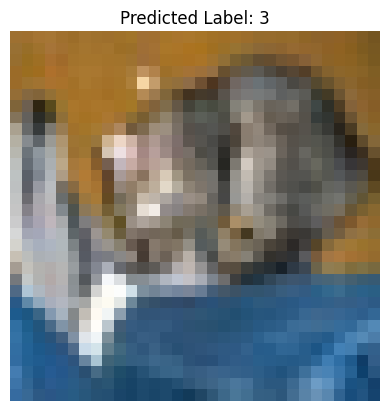

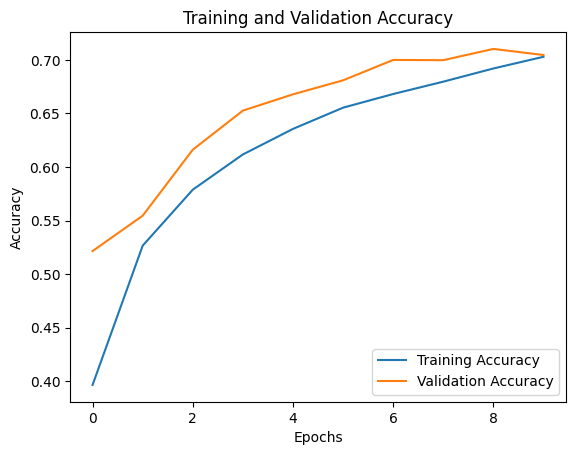

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Step 3: Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 4: Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Step 5: Define a CNN architecture
model = models.Sequential()

# First convolutional layer with ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer with ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer with ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(layers.Dropout(0.5))

# Flatten the output for the fully connected layers
model.add(layers.Flatten())

# Fully connected layer (dense layer) with ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (one for each class), softmax for multi-class classification
model.add(layers.Dense(10, activation='softmax'))

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Step 8: Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Step 9: Plot the predicted image
# Let's pick the first test image and predict the label
img_index = 0
img = x_test[img_index]  # Get the image from the test set

# Reshape the image for prediction (add batch dimension)
img_reshaped = np.expand_dims(img, axis=0)

# Make prediction using the trained model
predicted_class = model.predict(img_reshaped)
predicted_label = np.argmax(predicted_class)

# Display the image and the prediction
plt.imshow(img)
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

# Optional: You can also plot training and validation accuracy over epochs to see the training performance
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
